# Mapping China

Import required packages

In [79]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
import glob

Read in data

In [80]:
df_places = gpd.read_file('china2.json')
df_places.head()

,id,size,name,childNum,population,GDPpc,illiteracy,geometry
0,65,550,新疆维吾尔自治区,18,"21,813,334","49,475",2.3599999999999999,"POLYGON ((96.416 42.7588, 96.416 42.7148, 95.9..."
1,54,550,西藏自治区,7,"3,002,166","43,433",37.770000000000003,"POLYGON ((79.0137 34.3213, 79.1016 34.4531, 79..."
2,15,450,内蒙古自治区,12,"24,706,321","68,302",4.0700000000000003,"POLYGON ((97.20699999999999 42.8027, 99.4922 4..."
3,63,800,青海省,8,"5,626,722","47,690",10.23,"POLYGON ((89.7363 36.0791, 89.9121 36.0791, 90..."
4,51,900,四川省,21,"80,418,200","48,883",5.4400000000000004,"POLYGON ((101.7773 33.5303, 101.8652 33.5742, ..."


Remove formatting from population and GDP per capita columns

In [81]:
df_places['population'] = df_places['population'].str.replace(',','')

In [82]:
df_places['GDPpc'] = df_places['GDPpc'].str.replace(',','')

Values in population, GDPpc, and illiteracy columns need to be converted from strings to numeric values

In [83]:
print(type(df_places.loc[0,'population']))
print(type(df_places.loc[0,'GDPpc']))
print(type(df_places.loc[0,'illiteracy']))

<class 'str'>
<class 'str'>
<class 'str'>


In [84]:
df_places['population'] = pd.to_numeric(df_places['population'], errors='coerce')
df_places['GDPpc'] = pd.to_numeric(df_places['GDPpc'], errors='coerce')
df_places['illiteracy'] = pd.to_numeric(df_places['illiteracy'], errors='coerce')

Remove rows with missing values

In [85]:
df_places.dropna(how='any')

,id,size,name,childNum,population,GDPpc,illiteracy,geometry
0,65,550,新疆维吾尔自治区,18,21813334.0,49475.0,2.36,"POLYGON ((96.416 42.7588, 96.416 42.7148, 95.9..."
1,54,550,西藏自治区,7,3002166.0,43433.0,37.77,"POLYGON ((79.0137 34.3213, 79.1016 34.4531, 79..."
2,15,450,内蒙古自治区,12,24706321.0,68302.0,4.07,"POLYGON ((97.20699999999999 42.8027, 99.4922 4..."
3,63,800,青海省,8,5626722.0,47690.0,10.23,"POLYGON ((89.7363 36.0791, 89.9121 36.0791, 90..."
4,51,900,四川省,21,80418200.0,48883.0,5.44,"POLYGON ((101.7773 33.5303, 101.8652 33.5742, ..."
5,23,700,黑龙江省,13,38312224.0,43274.0,2.06,"POLYGON ((121.4648 53.3496, 123.6621 53.5693, ..."
6,62,690,甘肃省,14,25575254.0,31336.0,8.69,"POLYGON ((96.416 42.7148, 97.20699999999999 42..."
7,53,1200,云南省,16,45966239.0,37136.0,6.03,"POLYGON ((98.1738 28.125, 98.2617 28.3887, 98...."
8,45,1450,广西壮族自治区,14,46026629.0,41489.0,2.71,"POLYGON ((104.502 24.7412, 104.6777 24.6094, 1..."
9,43,1700,湖南省,14,65683722.0,52949.0,2.67,"POLYGON ((109.248 28.4766, 109.248 29.1357, 10..."


Plot

In [86]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

In [87]:
def create_map(title, column_value, color):
    fig, ax = plt.subplots(1, 1)
    plt.title(title, fontsize=30, pad=30)
    df_places.plot(column=column_value, ax=ax, legend=True, cmap=color)
    ax.set_axis_off()
    

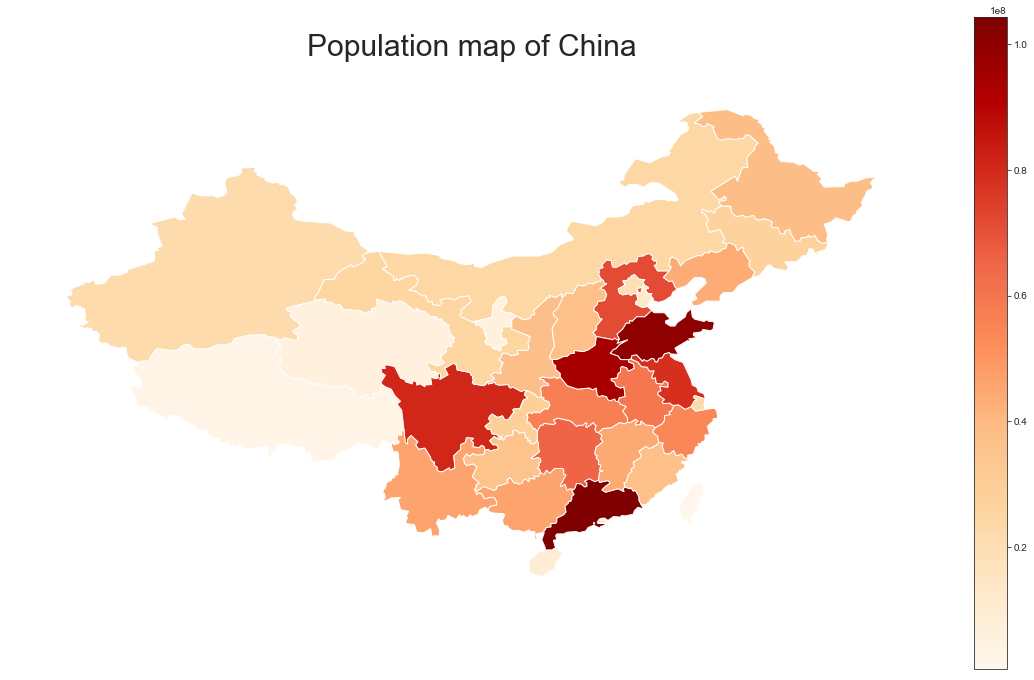

In [88]:
create_map('Population map of China', 'population', 'OrRd')

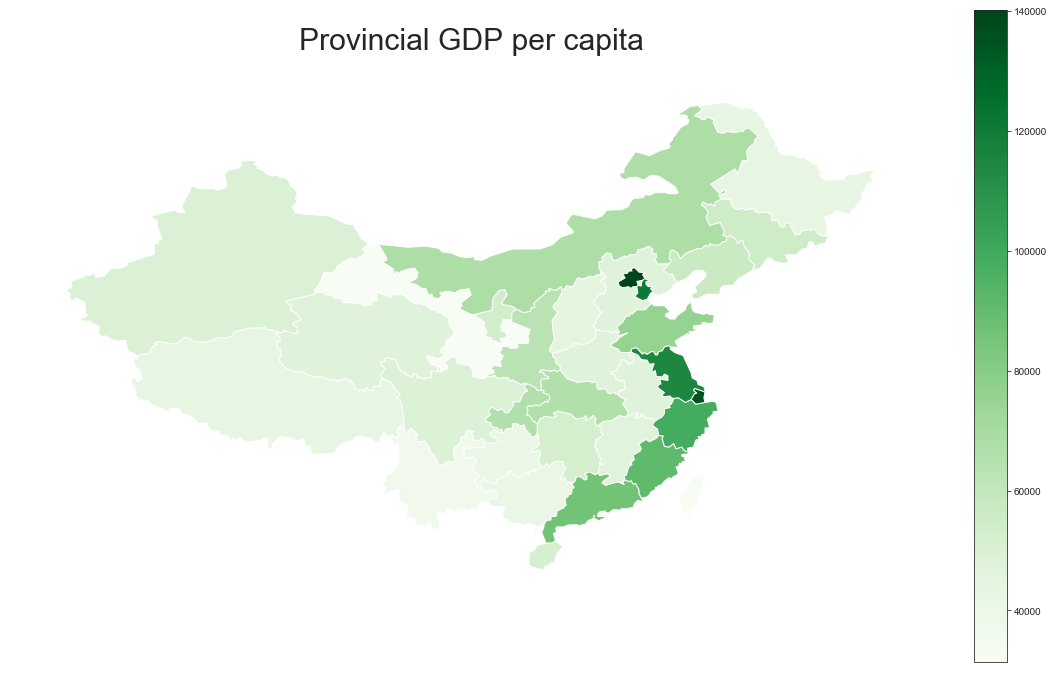

In [89]:
create_map("Provincial GDP per capita", 'GDPpc','Greens')

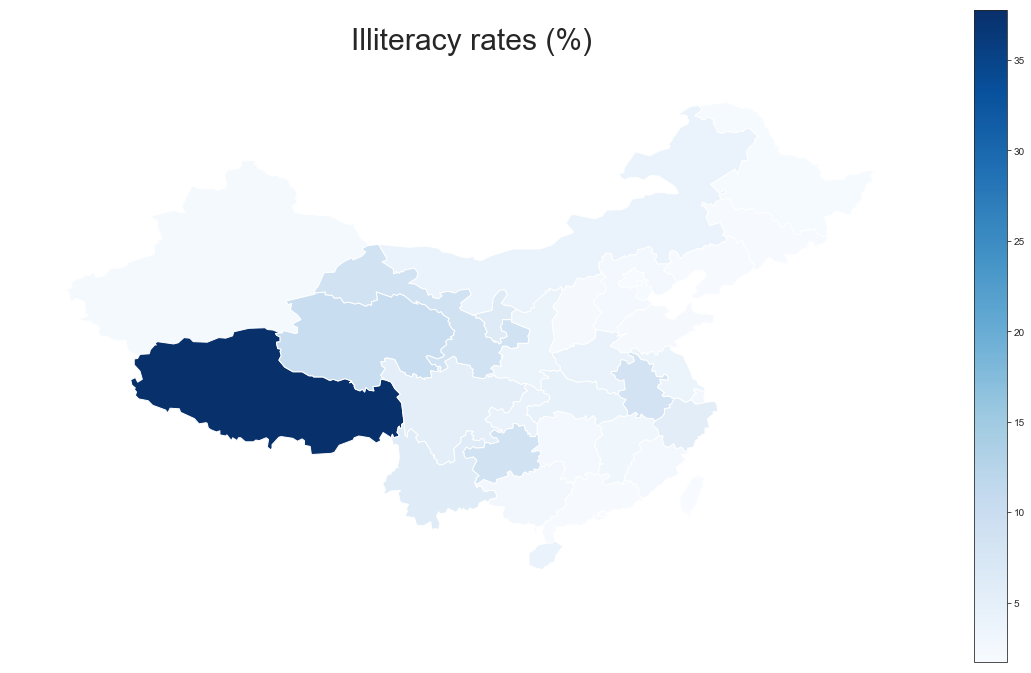

In [90]:
create_map("Illiteracy rates (%)", 'illiteracy', 'Blues')

Read in dataframe containing population data by province from 1912 to 2010

In [91]:
china_pop = pd.read_csv("China_pop.csv")

In [92]:
china_pop.head()

,Administrative Division,2010,2000,1990,1982,1964,1954,1947,1936,1928,1912
0,China,"1,339,724,852","1,265,830,000","1,160,017,381","1,031,882,511","723,070,269","601,938,035","457,111,000","479,085,000","474,786,000","411,643,000"
1,Guangdong,104303132,85225007,62829236,59299220,42800849,34770059,27210000,32453000,32428000,28011000
2,Shandong,100063065,89971789,84392827,74419054,55519038,48876548,38865000,38100000,28672000,30989000
3,Henan,94023567,91236854,85509535,74422739,50325511,44214594,29654000,34290000,30566000,28518000
4,Sichuan,80418200,82348296,107218173,99713310,67956490,62303999,47437000,52706000,47992000,48130000


Remove first row containing entire population

In [93]:
columns = list(china_pop)
columns.pop(0)
print(columns)
china_pop = china_pop.drop(china_pop.index[0])

['2010', '2000', '1990', '1982', '1964', '1954', '1947', '1936', '1928', '1912']


All cells contain strings that need to be converted to number values

In [94]:
for i in columns:
    china_pop[i] = pd.to_numeric(china_pop[i])

In [95]:
print(type(china_pop.iloc[2,4]))

<class 'numpy.float64'>


Swap rows and columns 

In [96]:
china_trans = china_pop.transpose()

In [97]:
china_trans.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
Administrative Division,Guangdong,Shandong,Henan,Sichuan,Jiangsu,Hebei,Hunan,Anhui,Hubei,Zhejiang,...,Inner Mongolia,Xinjiang,Shanghai,Beijing,Tianjin,Hainan,Hong Kong,Ningxia,Qinghai,Tibet
2010,104303132,100063065,94023567,80418200,78659903,71854202,65683722,59500510,57237740,54426891,...,24706321,21813334,23019148,19612368,12938224,9261518,7061200,6176900,5626722,3002166
2000,85225007,89971789,91236854,82348296,73043577,66684419,63274173,58999948,59508870,45930651,...,23323347,18459511,16407734,13569194,9848731,7559035,6708389,5486393,4822963,2616329
1990,6.28292e+07,8.43928e+07,8.55095e+07,1.07218e+08,6.70565e+07,6.10824e+07,6.06598e+07,5.61808e+07,5.39692e+07,4.14459e+07,...,2.14568e+07,1.51558e+07,1.33419e+07,1.08194e+07,8.7854e+06,6.55748e+06,5.752e+06,4.65545e+06,4.45695e+06,2.19601e+06
1982,5.92992e+07,7.44191e+07,7.44227e+07,9.97133e+07,6.05211e+07,5.30059e+07,5.40089e+07,4.96657e+07,4.78042e+07,3.88846e+07,...,1.92743e+07,1.30817e+07,1.18597e+07,9.23069e+06,7.76414e+06,NaN,5.1834e+06,3.89558e+06,3.89571e+06,1.89239e+06


Create a list of column names that care currently contained in the fiest row of the dataframe. Assign to columns and delete forst row.

In [98]:
new_header = list(china_trans.iloc[0])
china_trans.columns = new_header
china_trans = china_trans.drop(china_trans.index[0])

In [99]:
china_trans

,Guangdong,Shandong,Henan,Sichuan,Jiangsu,Hebei,Hunan,Anhui,Hubei,Zhejiang,...,Inner Mongolia,Xinjiang,Shanghai,Beijing,Tianjin,Hainan,Hong Kong,Ningxia,Qinghai,Tibet
2010,104303132,100063065,94023567,80418200,78659903,71854202,65683722,59500510,57237740,54426891,...,24706321,21813334,23019148,19612368,12938224,9261518,7061200,6176900,5626722,3002166
2000,85225007,89971789,91236854,82348296,73043577,66684419,63274173,58999948,59508870,45930651,...,23323347,18459511,16407734,13569194,9848731,7559035,6708389,5486393,4822963,2616329
1990,6.28292e+07,8.43928e+07,8.55095e+07,1.07218e+08,6.70565e+07,6.10824e+07,6.06598e+07,5.61808e+07,5.39692e+07,4.14459e+07,...,2.14568e+07,1.51558e+07,1.33419e+07,1.08194e+07,8.7854e+06,6.55748e+06,5.752e+06,4.65545e+06,4.45695e+06,2.19601e+06
1982,5.92992e+07,7.44191e+07,7.44227e+07,9.97133e+07,6.05211e+07,5.30059e+07,5.40089e+07,4.96657e+07,4.78042e+07,3.88846e+07,...,1.92743e+07,1.30817e+07,1.18597e+07,9.23069e+06,7.76414e+06,NaN,5.1834e+06,3.89558e+06,3.89571e+06,1.89239e+06
1964,4.28008e+07,5.5519e+07,5.03255e+07,6.79565e+07,4.45046e+07,4.56878e+07,3.71823e+07,3.12417e+07,3.37093e+07,2.83186e+07,...,1.23486e+07,7.27007e+06,1.08165e+07,7.5685e+06,NaN,NaN,3.12865e+06,NaN,2.1456e+06,1.25122e+06
1954,3.47701e+07,4.88765e+07,4.42146e+07,6.2304e+07,4.12522e+07,3.59846e+07,3.3227e+07,3.03436e+07,2.77897e+07,2.28657e+07,...,6.1001e+06,4.87361e+06,6.20442e+06,2.76815e+06,2.69383e+06,NaN,2.07e+06,NaN,1.67653e+06,1.27397e+06
1947,2.721e+07,3.8865e+07,2.9654e+07,4.7437e+07,3.608e+07,2.8719e+07,2.5558e+07,2.2462e+07,2.0976e+07,1.9959e+07,...,NaN,4.047e+06,4.63e+06,1.722e+06,1.773e+06,NaN,600000,759000,1.308e+06,1e+06
1936,3.2453e+07,3.81e+07,3.429e+07,5.2706e+07,3.6469e+07,2.8644e+07,2.8294e+07,2.3354e+07,2.5516e+07,2.1231e+07,...,NaN,4.36e+06,3.727e+06,1.551e+06,1.218e+06,NaN,1.64e+06,978000,1.196e+06,372000
1928,3.2428e+07,2.8672e+07,3.0566e+07,4.7992e+07,3.4126e+07,3.1232e+07,3.1501e+07,2.1715e+07,2.6699e+07,2.0643e+07,...,NaN,2.552e+06,NaN,NaN,NaN,NaN,840473,1.45e+06,619000,372000
1912,2.8011e+07,3.0989e+07,2.8518e+07,4.813e+07,3.2283e+07,2.6658e+07,2.7617e+07,1.6229e+07,2.959e+07,2.144e+07,...,NaN,2.098e+06,NaN,NaN,NaN,NaN,456739,303000,368000,1.16e+06


Reverse column order

In [100]:
china_rev = china_trans.iloc[::-1]

In [101]:
print(china_rev.loc['1912', 'Sichuan'])

48130000.0


Plot

Text(0.5, 1.0, "China's population by province")

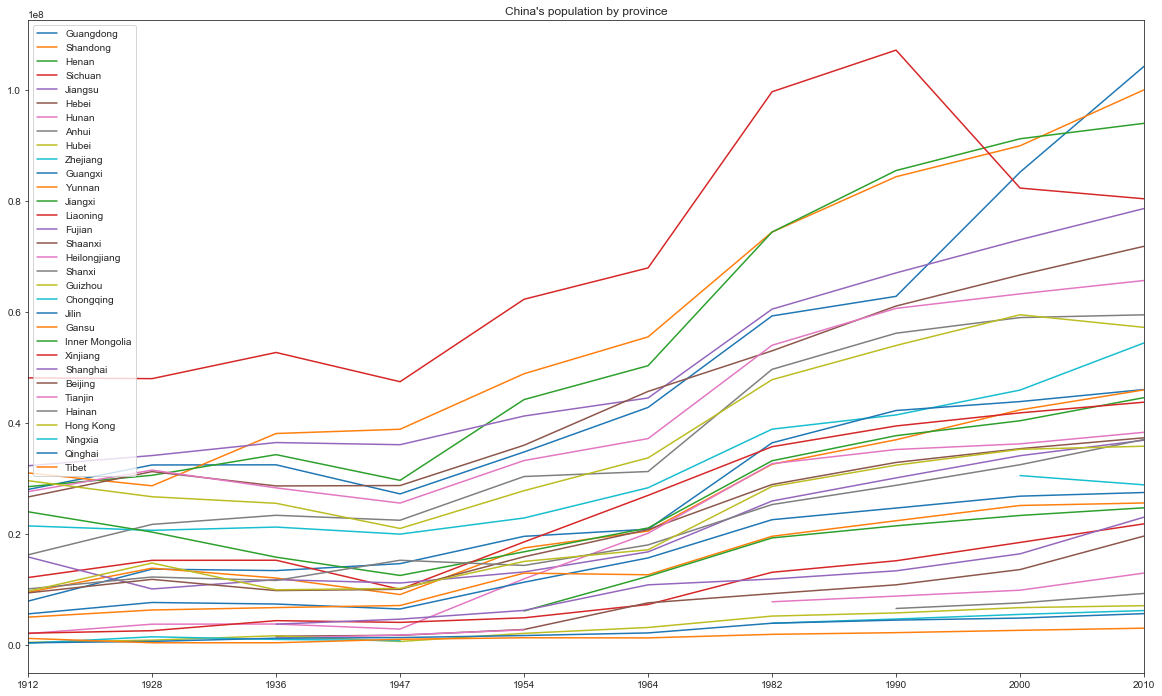

In [102]:
china_rev.plot()
plt.title("China's population by province")

There are missing population values for Chongqing in the dataset. I have tried to incorporate some additional data to get a general idea of the trend for the city, though the measure may be different as the source is not the same. 

In [103]:
china_rev.loc['1990', 'Chongqing'] = 4010000
china_rev.loc['1982', 'Chongqing'] = 2960000
china_rev.loc['1954', 'Chongqing'] = 1900000
china_rev.loc['1964', 'Chongqing'] = 2100000

In [104]:
cq = china_rev.loc[:, 'Chongqing']

In [105]:
cq

1912         NaN
1928         NaN
1936         NaN
1947      986000
1954     1900000
1964     2100000
1982     2960000
1990     4010000
2000    30512763
2010    28846170
Name: Chongqing, dtype: object

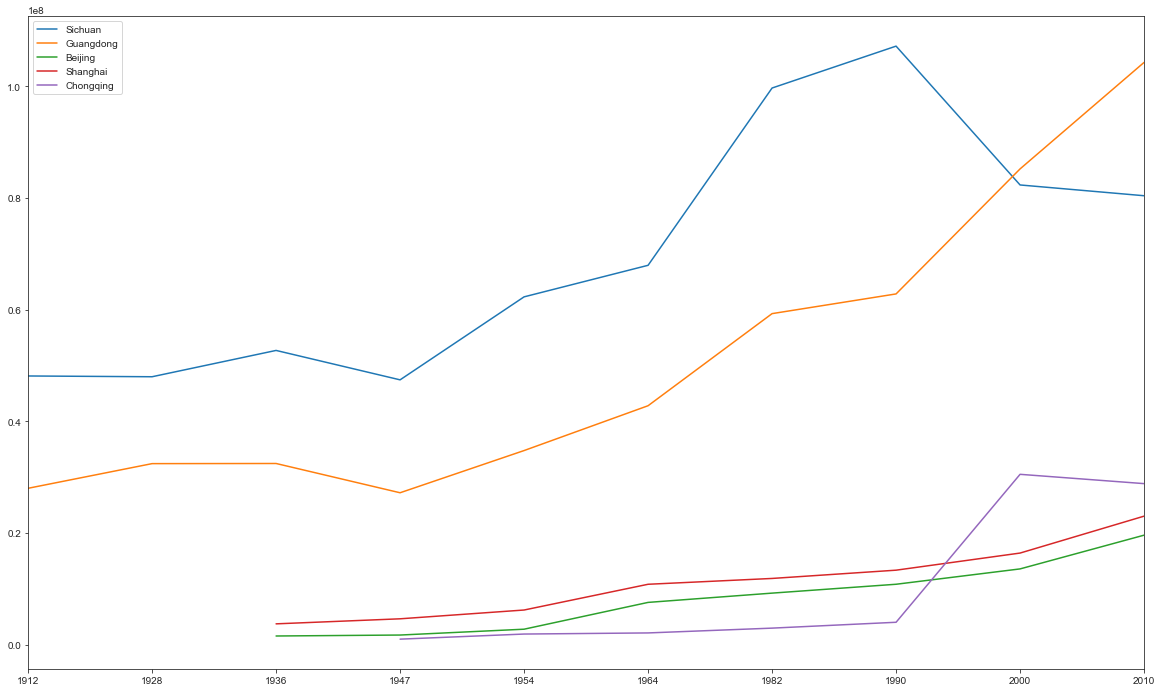

In [106]:
china_rev[['Sichuan', 'Guangdong', 'Beijing', 'Shanghai', 'Chongqing']].plot(kind='line')

Of interest here is the drastic increase in population in Guangdong from 1990, while Sichuan saw a massive decrease. Meanwhile, Chongqing, situated geographically in Sichuan province but reporting straight to Beijing, saw its population increase. This contrary motion may have to do with an increase in Chongqing's administrative area in the 1997, thereby reducing population of Sichuan Province as a whole.

In [107]:
city_data = gpd.read_file('cn.csv')
city_data.head()

,city,lat,lng,country,iso2,admin,capital,population,population_proper,geometry
0,Shanghai,31.222222,121.458056,China,CN,Shanghai,admin,14987000,14608512,None
1,Beijing,39.928819,116.388869,China,CN,Beijing,primary,11106000,7480601,None
2,Guangzhou,23.116667,113.25,China,CN,Guangdong,admin,8829000,3152825,None
3,Shenzhen,22.533333,114.133333,China,CN,Guangdong,minor,7581000,1002592,None
4,Wuhan,30.583333,114.266667,China,CN,Hubei,admin,7243000,4184206,None


In [108]:
city_position = city_data.loc[:, ['city', 'lat', 'lng']]

In [109]:
city_position = city_position.iloc[0:10, :]
city_position.head()

,city,lat,lng
0,Shanghai,31.222222,121.458056
1,Beijing,39.928819,116.388869
2,Guangzhou,23.116667,113.25
3,Shenzhen,22.533333,114.133333
4,Wuhan,30.583333,114.266667


In [110]:
city_position.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
city    10 non-null object
lat     10 non-null object
lng     10 non-null object
dtypes: object(3)
memory usage: 320.0+ bytes


In [111]:
city_position['lat'] = city_position['lat'].astype(float)

In [112]:
city_position['lng'] = city_position['lng'].astype(float)

In [113]:
city_position['geometry'] = gpd.points_from_xy(city_position.lng, city_position.lat)

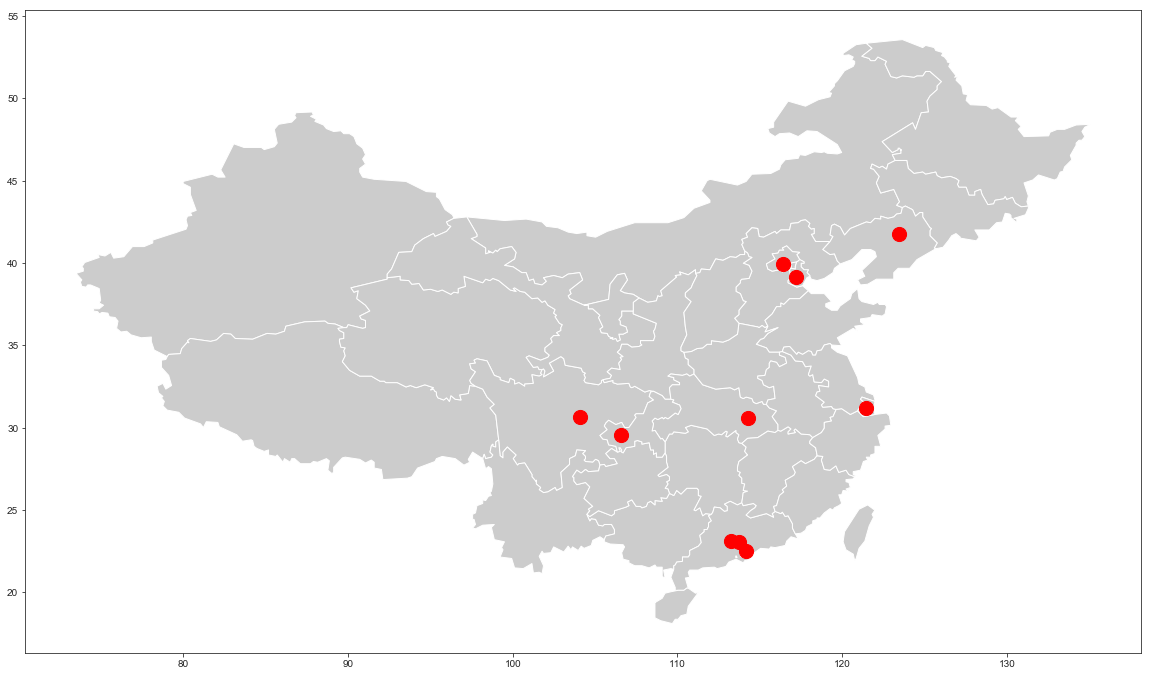

In [118]:
ax = df_places.plot(color='0.8')
city_position['geometry'].plot(ax=ax, color='red', markersize=200)
